![LU Logo](https://www.lu.lv/fileadmin/user_upload/LU.LV/www.lu.lv/Logo/Logo_jaunie/LU_logo_LV_horiz.png)


# Python datu vizualizācijas bibliotēkas – Matplotlib

## Nodarbības saturs

Mēs apskatīsim sekojošas tēmas:

* Matplotlib vizualizācijas bibliotēka
* Seaborn vizualizācijas bibliotēka - funkcionalitāte, kas papildina matplotlib

## Nodarbības mērķi

Nodarbības beigās Jums būtu jāspēj:

* izveidot vizualizācijas ar Matplotlib
* izveidot un uzlabot vizualizācijas ar Seaborn

### Vajadzīgo bibliotēku importēšana

In [1]:
# generally imports go at the top of a notebook
# python version
import sys
print(f"Python version: {sys.version}")

Python version: 3.12.7 (main, Oct 16 2024, 07:12:08) [Clang 18.1.8 ]


#### Matplotlib instalēšana

Matplotlib jau ir instalēts gan Google Colab vidē, gan Anaconda Python distribūcijā. Šādā gadījumā nekāda papildus instalēšana nav nepieciešama.

Ja Jūs lietojat citu Python distribūciju, kurā Matplotlib nav instalēts, to var uzinstalēt ar komandas `pip` palīdzību:

```bash
pip install matplotlib
```

Ja Jūs instalējat pandas vai seaborn, tad tiks uzinstalēts arī Matplotlib.


In [2]:
# general imports related to matplotlib
import matplotlib.pyplot as plt # alias plt is common
from matplotlib import cm  # cm stands for colormap
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# often numpy is used to process data
import numpy as np

In [3]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  

## 1. tēma - matplotlib bibliotēka

![matplotlib](https://upload.wikimedia.org/wikipedia/en/thumb/5/56/Matplotlib_logo.svg/600px-Matplotlib_logo.svg.png)

Matplotlib ir visaptveroša Python datu vizualizācijas bibliotēka, kas ļauj veidot statiskas, animētas un interaktīvas vizualizācijas.

- https://matplotlib.org/
- [Matplotlib quickstart guide](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

#### matplotlib vēsture

Matplotlib sākotnēji 2003. gadā izveidoja John D. Hunter kā veidu kā Python valodā replicēt MATLAB vizualizācijas iespējas. Šo projektu šobrīd uztur liela brīvprātīgo dalībnieku komanda.

---

### Matplotlib apmācības materiāls

Šīs Matplotlib apmācības pamatā ir Nicolas P. Rougier izveidotais apmācības materiāls:
- https://github.com/rougier/matplotlib-tutorial

Šī apmācības materiāla licence ir [Creative Commons
Attribution-ShareAlike 4.0](http://creativecommons.org/licenses/by-sa/4.0).

### Matplotlib - divi veidi, kā to izmantot

Matplotlib var izmantot divos veidos:
1. **Pyplot API** - vienkāršākais veids, kā izmantot Matplotlib. Šajā gadījumā visi objekti tiek automātiski izveidoti un uzturēti aizkulisēs.

Mūsu piemēros, kuros izmantojam plt.plot() un plt.show() funkcijas, mēs izmantojam Pyplot API.

2. **Objektorientēts API** - šis veids ir vairāk orientēts uz objektiem un ļauj lietotājam detalizēti kontrolēt visus Matplotlib objektus.

Mūsu piemēros, kuros veidojam ax un fig objektus, mēs izmantojam objektorientēto API.

Dažreiz šie divi veidi tiek lietoti sajaukti, bet ir svarīgi saprast, ka tie ir divi atšķirīgi veidi, kā izmantot Matplotlib.

#### Sīkāk par Matplotlib API

Sīkāka informācija par šiem diviem veidiem ir pieejama:

* [dokumentācija](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html)
* [matplotlib blog](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)
* [Python Plotting With Matplotlib (Guide)](https://realpython.com/python-matplotlib-guide/)

In [4]:
from matplotlib.animation import FuncAnimation


In [5]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

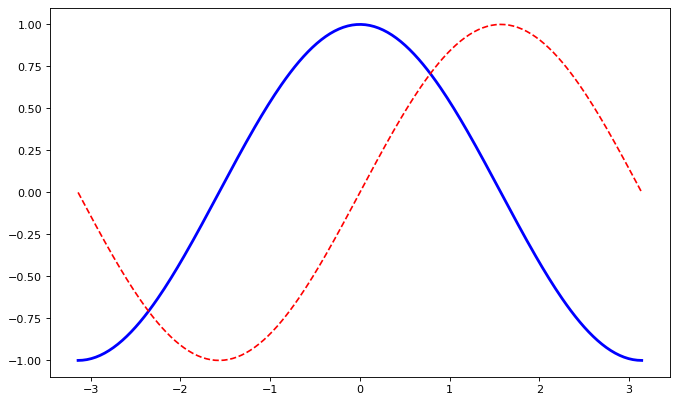

In [6]:
# we create a figure instance
# figsize is a tuple of the width and height of the figure in inches
# dpi stands for dots per inch
plt.figure(figsize=(10,6), dpi=80)

# we create a plot with a blue line
# First two parameters are the sequences of x and y data
# x values are optional, if not provided, they are assumed to be 0,1,2,3,4,5,6,7...
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")

# we create a second plot with a different line style
plt.plot(X, S, color="red",  linewidth=1.5, linestyle="--")
plt.show() # plt.show() is needed to display plots

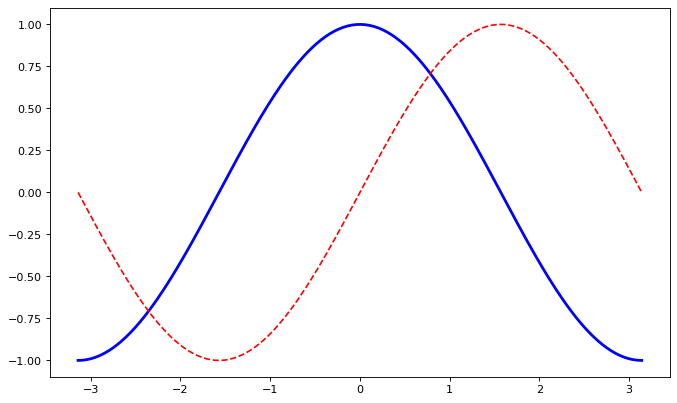

In [7]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=1.5, linestyle="--")
# only change from previous is that we change display limits
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

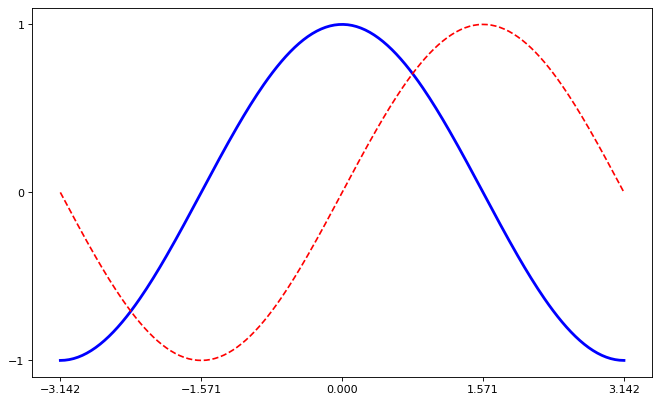

In [8]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=1.5, linestyle="--")

# here we provide custom ticks for x and y axes
plt.xticks( [-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

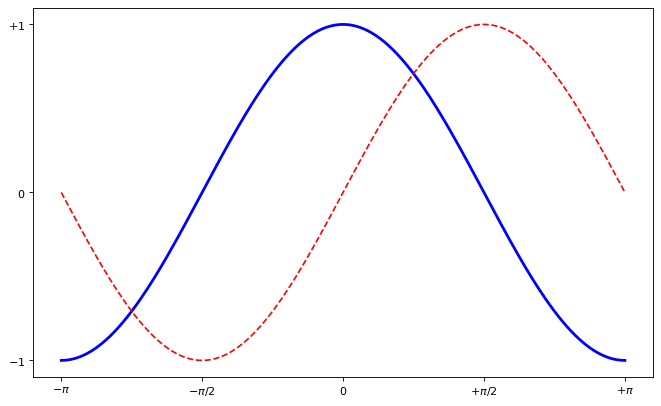

In [9]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=1.5, linestyle="--")

# here we provide custom ticks for x and y axes
# we use LaTeX to render the labels
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

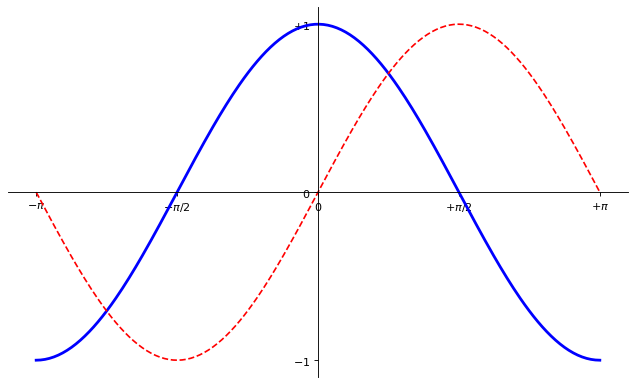

In [10]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red",  linewidth=1.5, linestyle="--")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

ax = plt.gca()

# we add custom spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
plt.show()

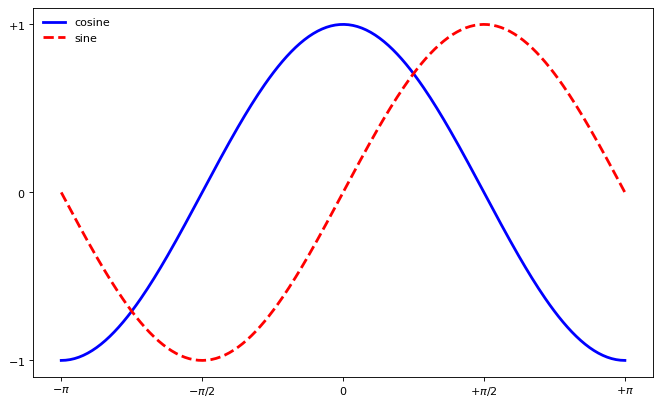

In [11]:
plt.figure(figsize=(10,6), dpi=80)
# we use label parameter to provide a legend
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="--", label="sine")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

# custom location for legend
plt.legend(loc='upper left', frameon=False)
plt.show()

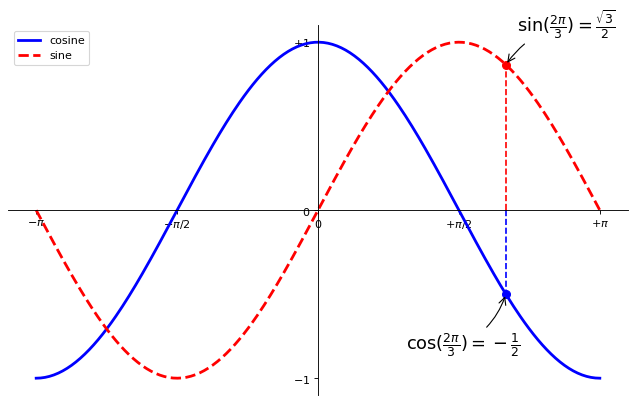

In [12]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="--", label="sine")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)], color ='blue', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# custom annotations, note use of LaTeX
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)], color ='red', linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')

plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=True)
plt.show()

In [13]:
help(plt.annotate)

Help on function annotate in module matplotlib.pyplot:

annotate(text: 'str', xy: 'tuple[float, float]', xytext: 'tuple[float, float] | None' = None, xycoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float]' = 'data', textcoords: 'str | Artist | Transform | Callable[[RendererBase], Bbox | Transform] | tuple[float, float] | None' = None, arrowprops: 'dict[str, Any] | None' = None, annotation_clip: 'bool | None' = None, **kwargs) -> 'Annotation'
    Annotate the point *xy* with text *text*.

    In the simplest form, the text is placed at *xy*.

    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.

    Parameters
    ----------
    text : str
        The text of the annotation.

    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.

    xytext : 

### Matplotlib piemēri

Šie piemēri demonstrē dažādas Matplotlib vizualizāciju iespējas.


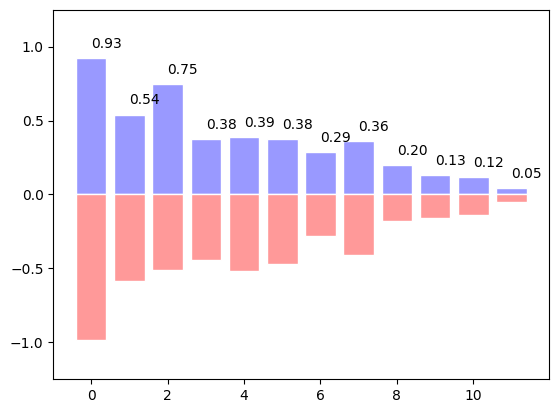

In [14]:
n = 12
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x,y in zip(X,Y1):
    plt.text(x+0.4, y+0.05, '%.2f' % y, ha='center', va= 'bottom')

plt.ylim(-1.25,+1.25)
plt.show()

/var/folders/lp/4x3s75t55cbf6dq_k1jcxllm0000gn/T/ipykernel_31947/1781127683.py:13: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)


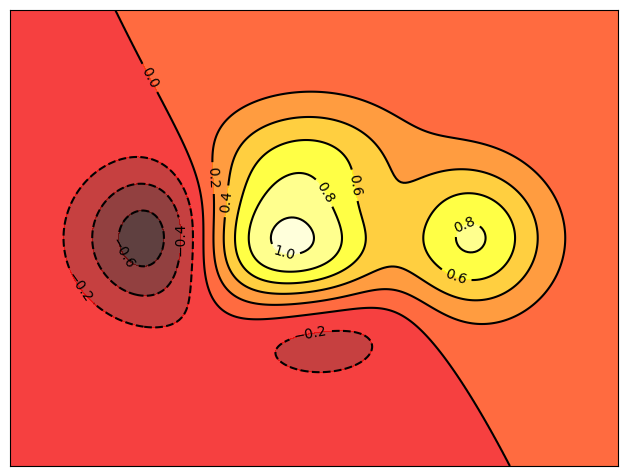

In [15]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.axes([0.025,0.025,0.95,0.95])

# note use of function f to generate Z values for contour plot
plt.contourf(X, Y, f(X,Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X,Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks([]), plt.yticks([])
plt.show()

(([], []), ([], []))

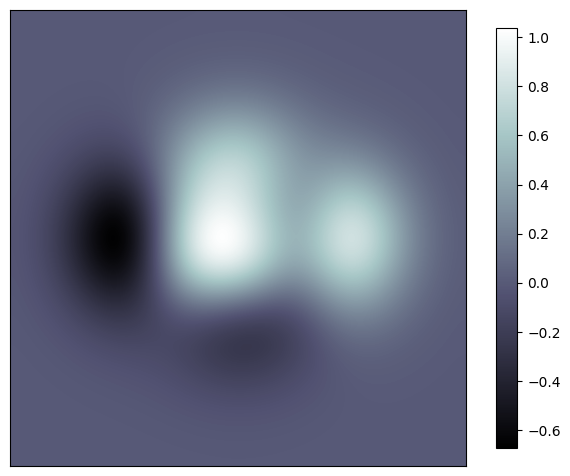

In [16]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 10
x = np.linspace(-3,3,3*n)
y = np.linspace(-3,3,3*n)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.axes([0.025,0.025,0.95,0.95])

# imshow is used to display images
# https://matplotlib.org/stable/plot_types/arrays/imshow.html#imshow-z
plt.imshow(Z,interpolation='bicubic', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks([]), plt.yticks([])


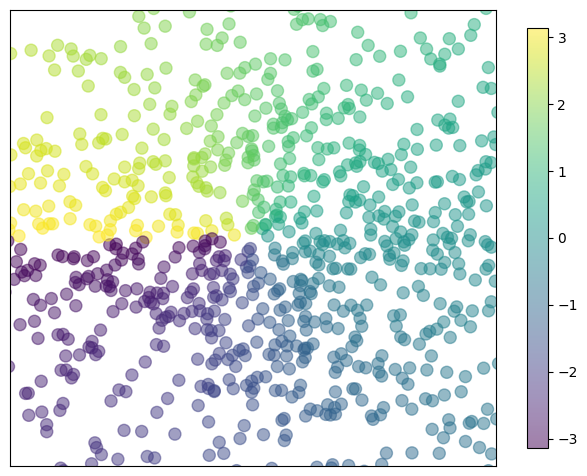

In [17]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
# we provide color values for each point
plt.scatter(X,Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.colorbar(shrink=.92)

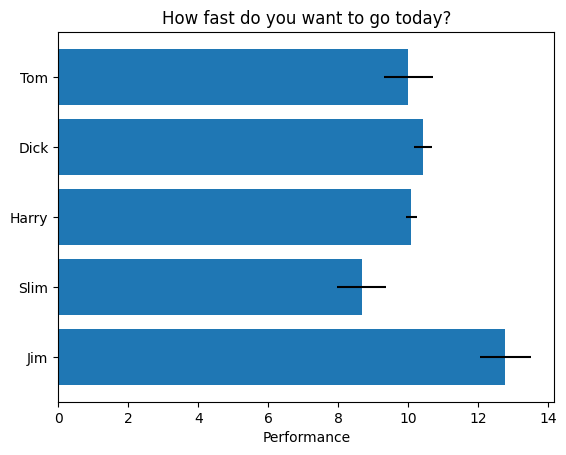

In [18]:
# Fixing random state for reproducibility
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

# we use horizontal bar chart
ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

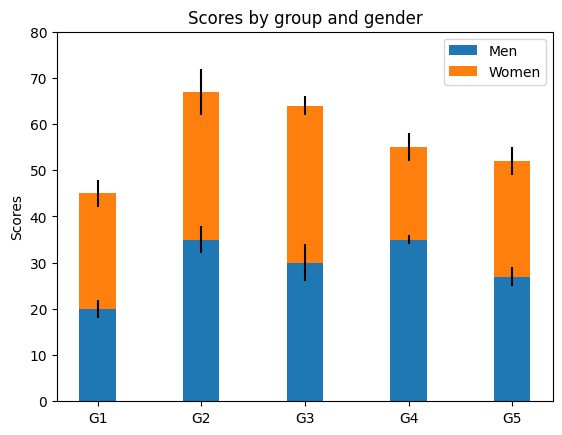

In [19]:
# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

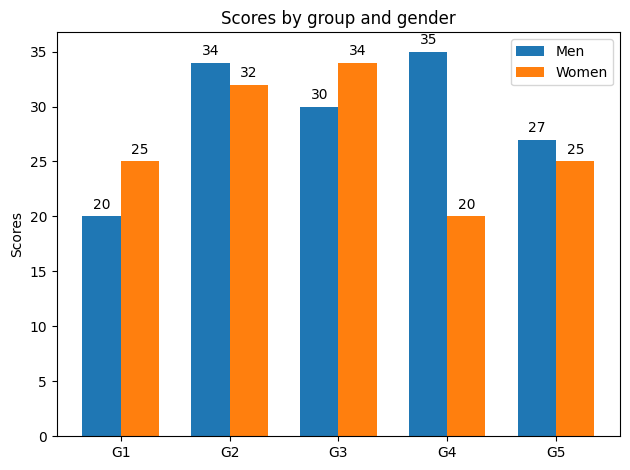

In [20]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

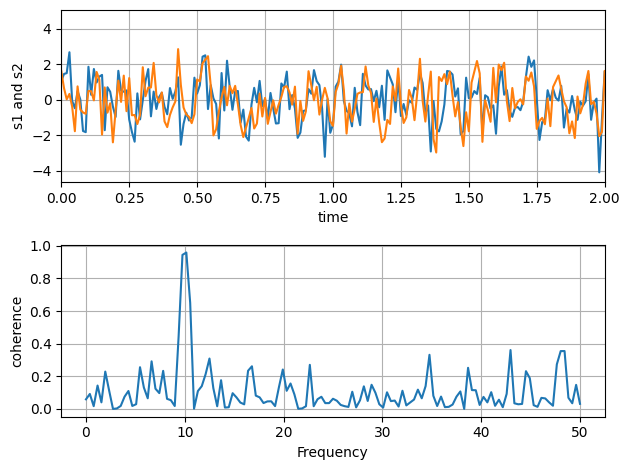

In [21]:
# https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html#sphx-glr-gallery-lines-bars-and-markers-cohere-py
# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

# usage of subplots
fig, axs = plt.subplots(2, 1)  # 2 here means 2 rows, 1 column
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

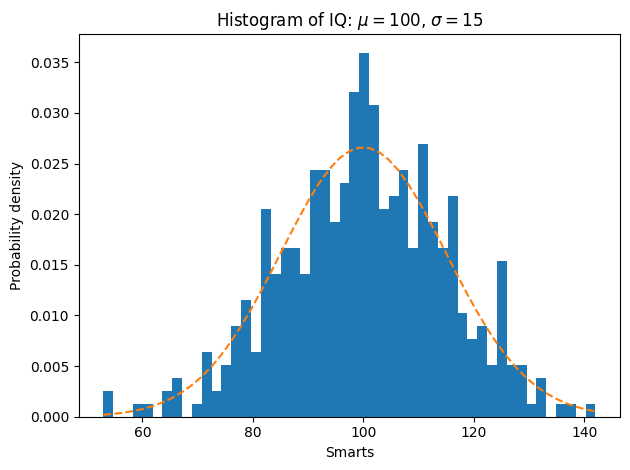

In [22]:
# https://matplotlib.org/gallery/statistics/histogram_features.html
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

---

**Boxplots**

![Boxplot diagram](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)

Attēls: [Jhguch at en.wikipedia](https://commons.wikimedia.org/wiki/File:Boxplot_vs_PDF.svg).

Text(0.5, 1.0, 'box plot')

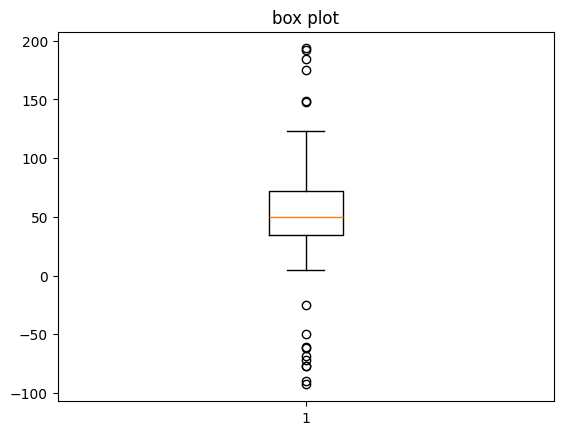

In [23]:
from matplotlib.patches import Polygon

# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, ax = plt.subplots()

ax.boxplot(data)
ax.set_title('box plot')

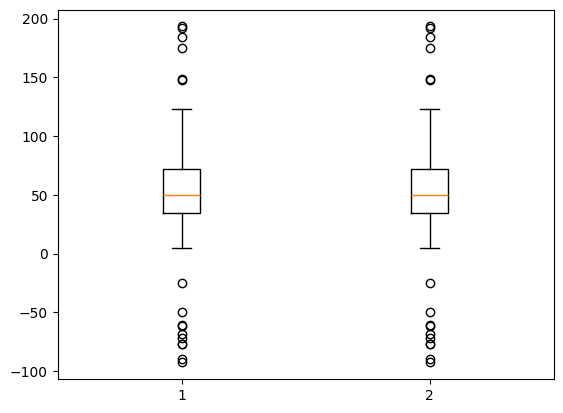

In [24]:
data2 = [data, data]

fig, ax = plt.subplots()

_ = ax.boxplot(data2)

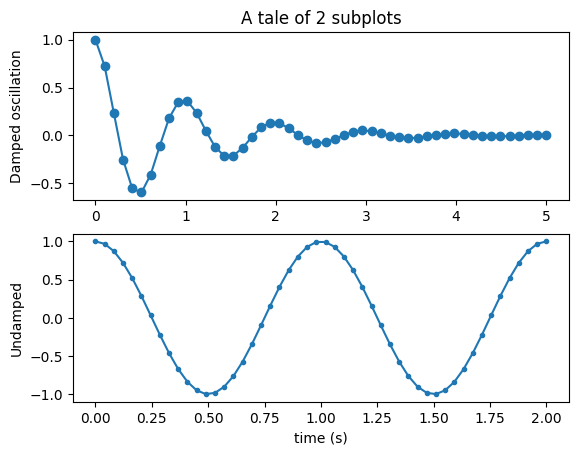

In [25]:
# https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

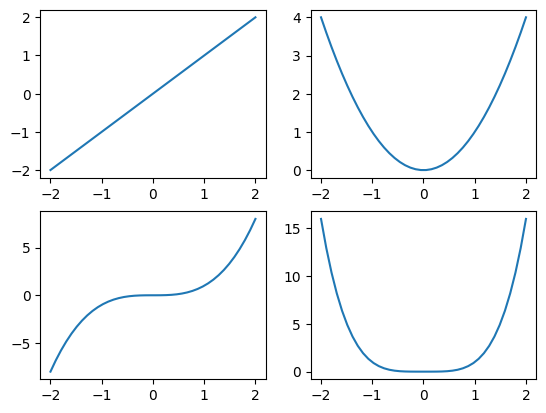

In [26]:
x = np.linspace(-2.0, 2.0, 40)

plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)

plt.show()

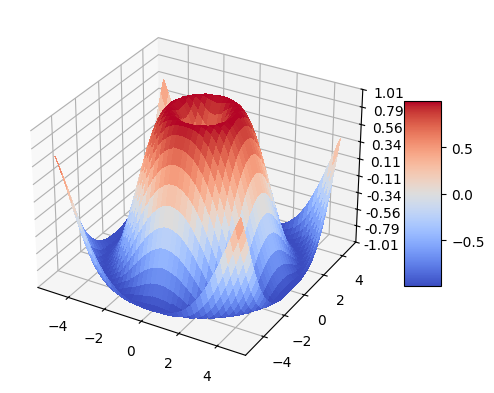

In [27]:
# https://matplotlib.org/gallery/mplot3d/surface3d.html

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 2. tēma - Seaborn

Seaborn ir uz Matplotlib pamata veidota Python datu vizualizācijas bibliotēka.

Tā nodrošina augsta līmeņa saskarni pievilcīgu un informatīvu vizualizāciju attēlošanai.

https://seaborn.pydata.org/

In [28]:
# Import seaborn
import seaborn as sns  # common alias is sns

# version
print(f"Seaborn version: {sns.__version__}")

# Apply the default theme
sns.set_theme()

Seaborn version: 0.13.2


In [29]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

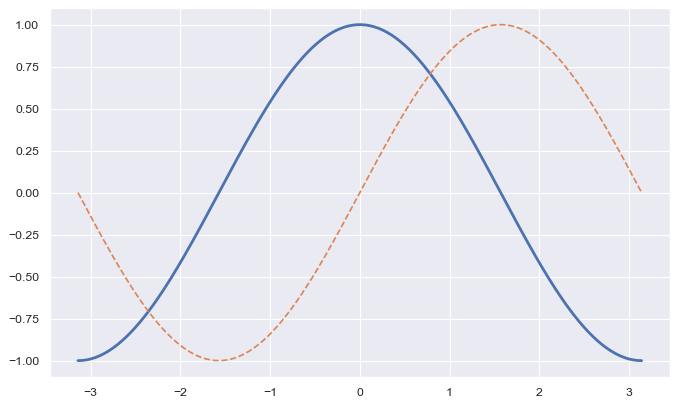

In [30]:
sns.set_theme(style="darkgrid")

# we still use plt.figure to create a figure
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, linewidth=2.5, linestyle="-")
plt.plot(X, S, linewidth=1.5, linestyle="--")
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

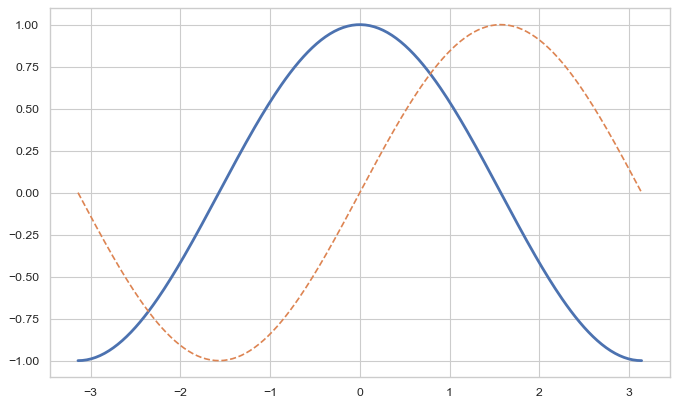

In [31]:
sns.set_theme(style="whitegrid")
# list of seaborn themes: darkgrid, whitegrid, dark, white, ticks
# https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme

plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, linewidth=2.5, linestyle="-")
plt.plot(X, S, linewidth=1.5, linestyle="--")
plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)
plt.show()

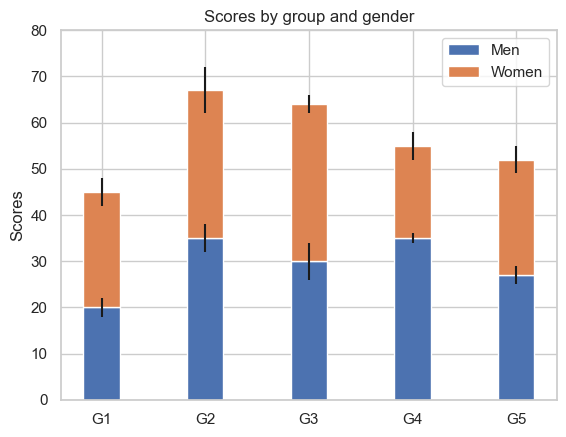

In [32]:
# https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [33]:
# seaborn provides some popular datasets

tips = sns.load_dataset("tips")
# tips dataset is a collection of data related to tips in a restaurant
# tips is provided as pandas DataFrame
print(type(tips))

<class 'pandas.core.frame.DataFrame'>


In [34]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


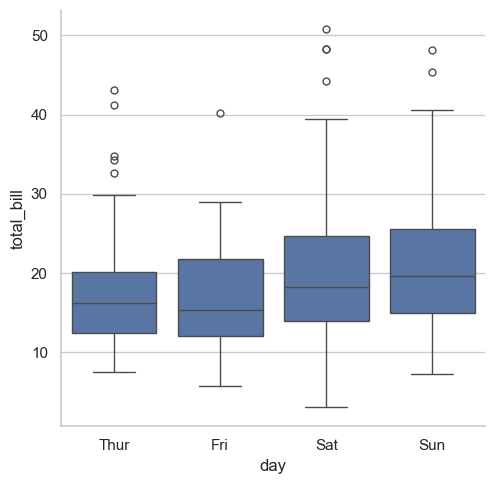

In [35]:
# we can feed in the DataFrame directly to seaborn
# and provide column names as strings
# also we can set the type of plot we want
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

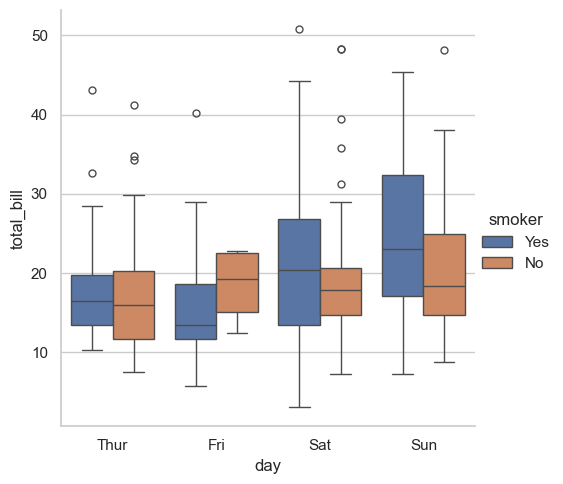

In [36]:
# Category Plots let us compare data across categories
# we can use hue parameter to provide another category

sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

## Kopsavilkums

Šajā nodarbībā Jūs apguvāt:

- kā izveidot Matplotlib vizualizācijas
- kā izveidot Seaborn vizualizācijas


## Noderīgi resursi

Matplotlib:
- [Matplotlib piemēri](https://matplotlib.org/stable/gallery/index.html)
- [Ātrais ievads Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html)
- [Real Python: Matplotlib apmācība](https://realpython.com/python-matplotlib-guide/)
- [Pyplot apmācība](https://matplotlib.org/stable/tutorials/pyplot.html)

Seaborn:
- [Seaborn projekts](https://seaborn.pydata.org/index.html)
- [Seaborn vizualizāciju galerija](https://seaborn.pydata.org/examples/index.html)
- [Vizualizācija ar Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) - Python Data Science Handbook